# Problem 2 - Perform hashtag frequency analysis from a COVID-19 tweet dataset.

In [ ]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/covid19_tweets.csv')

In [ ]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [ ]:
print(df.columns)

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')


In [ ]:
# function for extracting hashtags
def extract_hashtags(text):
    return re.findall(r"#\w+", str(text))

df['hashtags'] = df['text'].apply(extract_hashtags)

In [ ]:
all_hashtags = [hashtag.lower() for hashtags in df['hashtags'] for hashtag in hashtags]

hashtag_count = Counter(all_hashtags)
hashtag_df = pd.DataFrame(hashtag_count.items(), columns=['Hashtag', 'Frequency'])

hashtag_df = pd.DataFrame(hashtag_count.most_common(20), columns = ['Hashtag', 'Frequency'])
print(hashtag_df)

                 Hashtag  Frequency
0               #covid19      29383
1           #coronavirus       3040
2              #pandemic        496
3                #corona        404
4                 #covid        394
5                 #india        392
6                 #trump        290
7              #covid_19        275
8              #lockdown        274
9   #coronaviruspandemic        259
10            #wearamask        225
11    #indiafightscorona        222
12    #coronavirusupdate        207
13               #odisha        202
14   #hydroxychloroquine        201
15   #coronavirusupdates        183
16             #covidー19        183
17                #china        177
18         #coronainfoch        176
19                #masks        162


<ipython-input-17-5c0490ca24e8>:8: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


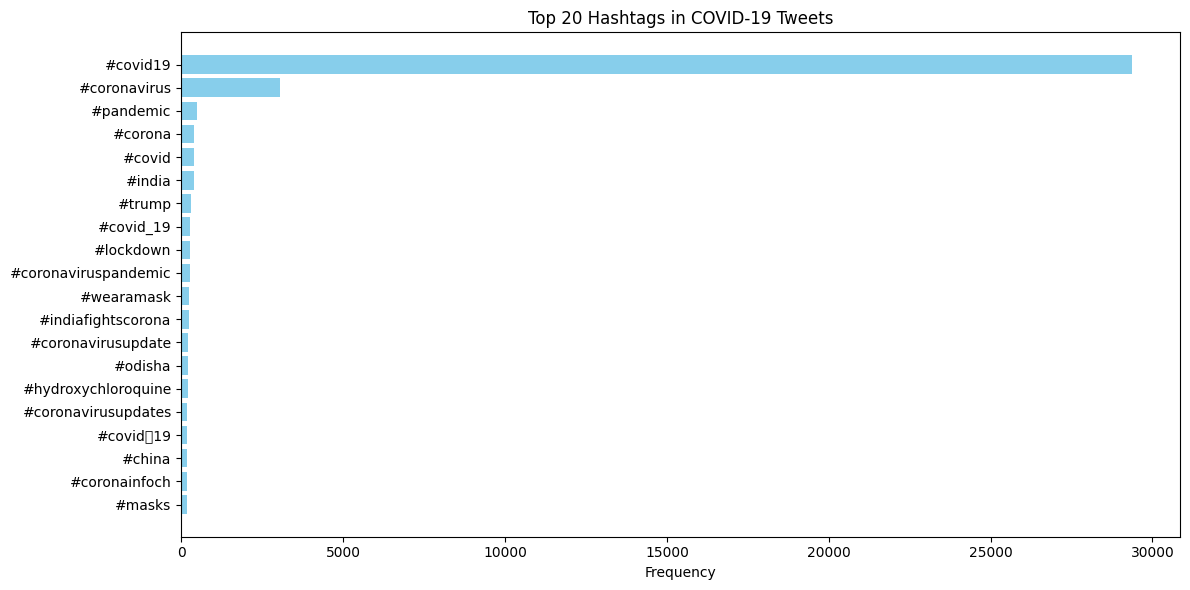

In [ ]:
hashtag_df = hashtag_df.sort_values(by='Frequency', ascending=False).head(20)

plt.figure(figsize=(12,6))
plt.barh(hashtag_df['Hashtag'], hashtag_df['Frequency'], color='skyblue')
plt.xlabel("Frequency")
plt.title("Top 20 Hashtags in COVID-19 Tweets")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()